## Indikator penilaian
## Wajib di google colab, jika tidak di google colab ada pengurangan nilai -5
## Pengerjaan harus sesuai template yang disediakan, jika tidak ada pengurangan nilai -5 (untuk memudahkan membaca code)
## share to arifromadhan19@gmail.com

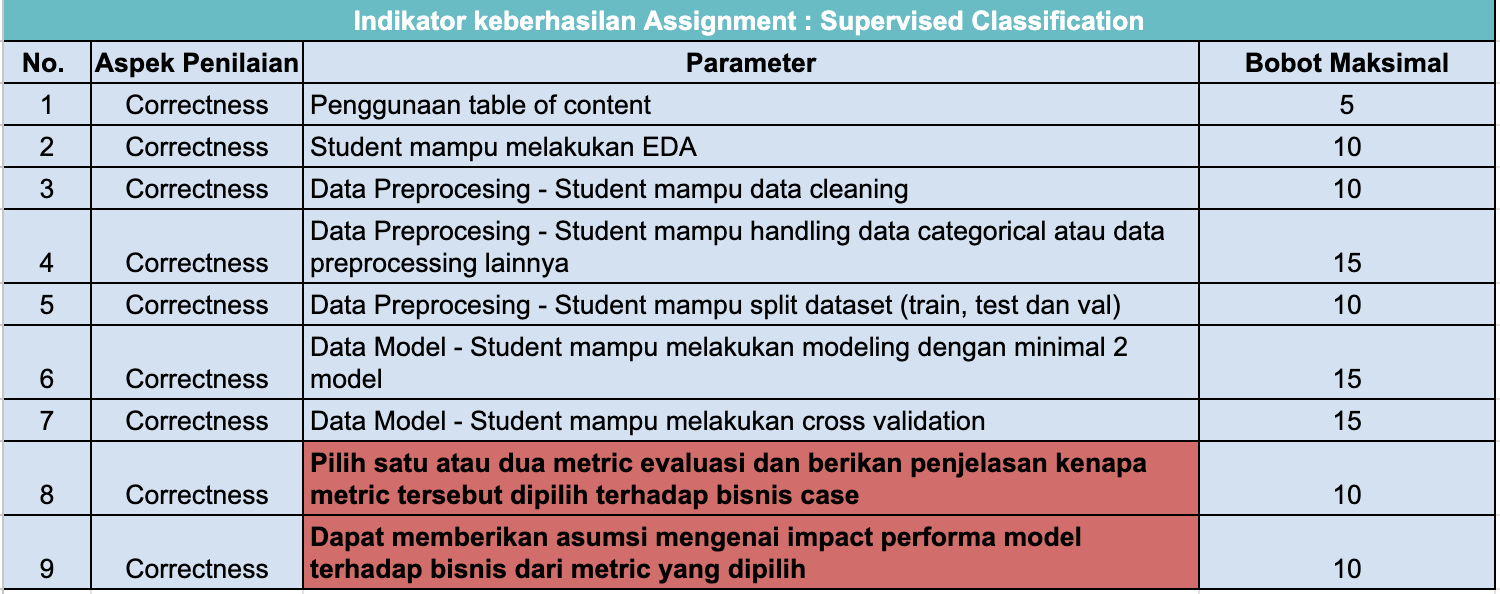

## Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dibimbing/Assignment/ADay36 - Exploring Machine Learning Models with Python: Advanced Classification Techniques /1702184567307-WA_FnUseC_TelcoCustomerChurn.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#mengganti tipe data
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
#drop kolum yang tidak perlu
df = df.drop(['customerID'],axis = 1)

In [ ]:
#merubah nilai Yes menjadi 1 dan No menjadi 0 di kolum Churn
map_churn = {
    'Yes' : 1,
    'No': 0
}
df['Churn'] = df['Churn'].map(map_churn)

## Split Dataset

In [ ]:
X = df.drop(['Churn'],axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape

((5634, 19), (1409, 19))

In [ ]:
#melihat proporsi churn rate pada y
y.value_counts(normalize=True)

,proportion
Churn,
0,0.73463
1,0.26537


terjadi imbalace pada data train, dan akan di handling imbalance pada data train sebelum pemodelan

## Train

## EDA

### Data Preprocessing

#### Missing Value

In [ ]:
#cek value with isnull
X_train.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
#cek missing value satu-satu
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= gender =================


,count
gender,
Male,3555
Female,3488



============= SeniorCitizen =================


,count
SeniorCitizen,
0,5901
1,1142



============= Partner =================


,count
Partner,
No,3641
Yes,3402



============= Dependents =================


,count
Dependents,
No,4933
Yes,2110



============= tenure =================


,count
tenure,
1,613
72,362
2,238
3,200
4,176
71,170
5,133
7,131
8,123



============= PhoneService =================


,count
PhoneService,
Yes,6361
No,682



============= MultipleLines =================


,count
MultipleLines,
No,3390
Yes,2971
No phone service,682



============= InternetService =================


,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526



============= OnlineSecurity =================


,count
OnlineSecurity,
No,3498
Yes,2019
No internet service,1526



============= OnlineBackup =================


,count
OnlineBackup,
No,3088
Yes,2429
No internet service,1526



============= DeviceProtection =================


,count
DeviceProtection,
No,3095
Yes,2422
No internet service,1526



============= TechSupport =================


,count
TechSupport,
No,3473
Yes,2044
No internet service,1526



============= StreamingTV =================


,count
StreamingTV,
No,2810
Yes,2707
No internet service,1526



============= StreamingMovies =================


,count
StreamingMovies,
No,2785
Yes,2732
No internet service,1526



============= Contract =================


,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473



============= PaperlessBilling =================


,count
PaperlessBilling,
Yes,4171
No,2872



============= PaymentMethod =================


,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522



============= MonthlyCharges =================


,count
MonthlyCharges,
20.05,61
19.85,45
19.95,44
19.90,44
20.00,43
19.65,43
19.70,43
19.55,40
20.15,40



============= TotalCharges =================


,count
TotalCharges,
20.20,11
19.75,9
19.65,8
19.90,8
20.05,8
45.30,7
19.55,7
19.45,6
20.25,6



============= Churn =================


,count
Churn,
0,5174
1,1869


terdapat 11 missing value di kolum total charges

In [ ]:
# Handling missing value di kolum TotalCharges di data train
X_train['TotalCharges'] = X_train['TotalCharges'].fillna(X_train['TotalCharges'].median())
print('median TotalCharges : ', X_train['TotalCharges'].median())

median TotalCharges :  1410.8


#### Outlier

<Axes: ylabel='TotalCharges'>

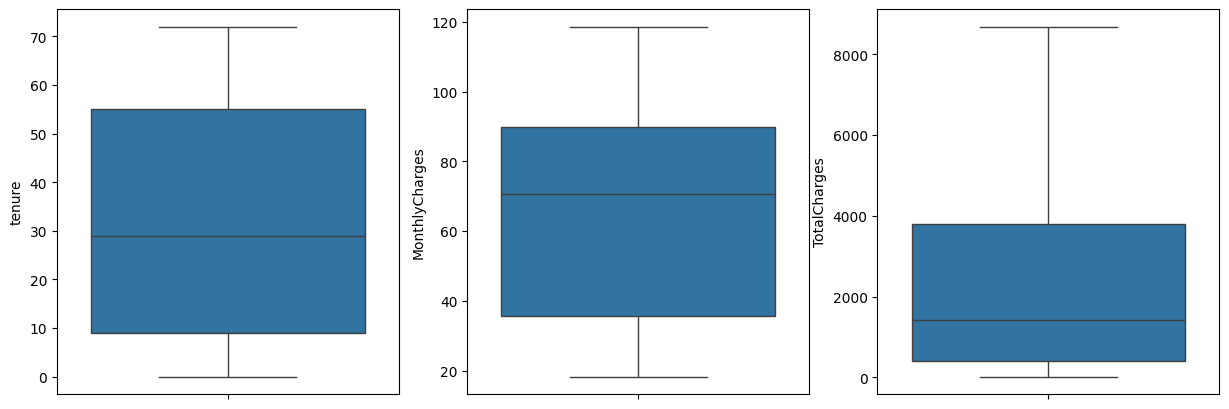

In [ ]:
#cek outlier menggunakan box plot
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(y = X_train['tenure'], data=X_train, ax=ax[0])
sns.boxplot(y = X_train['MonthlyCharges'], data=X_train, ax=ax[1])
sns.boxplot(y = X_train['TotalCharges'], data=X_train, ax=ax[2])

there's no outlier

#### Categorical Encoding

In [ ]:
X_train_ = X_train.copy() #melakukan copy data train untuk eda pada data kategori

In [ ]:
# Mengambil kolom yang bukan numerik
kolom_non_numerik = X_train.select_dtypes(exclude=['number']).columns.tolist()
kolom_non_numerik

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
# Kolom-kolom yang ingin di-label encode
categorical_cols = ['gender',
                    'Partner',
                    'Dependents',
                    'PhoneService',
                    'MultipleLines',
                    'InternetService',
                    'OnlineSecurity',
                    'OnlineBackup',
                    'DeviceProtection',
                    'TechSupport',
                    'StreamingTV',
                    'StreamingMovies',
                    'Contract',
                    'PaperlessBilling',
                    'PaymentMethod']

In [ ]:
# Apply label encoding to train data
label_encoders = {}  # Initialize an empty dictionary to store label encoders
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    label_encoders[col] = le  # Save the encoder for test data

#### Visualization

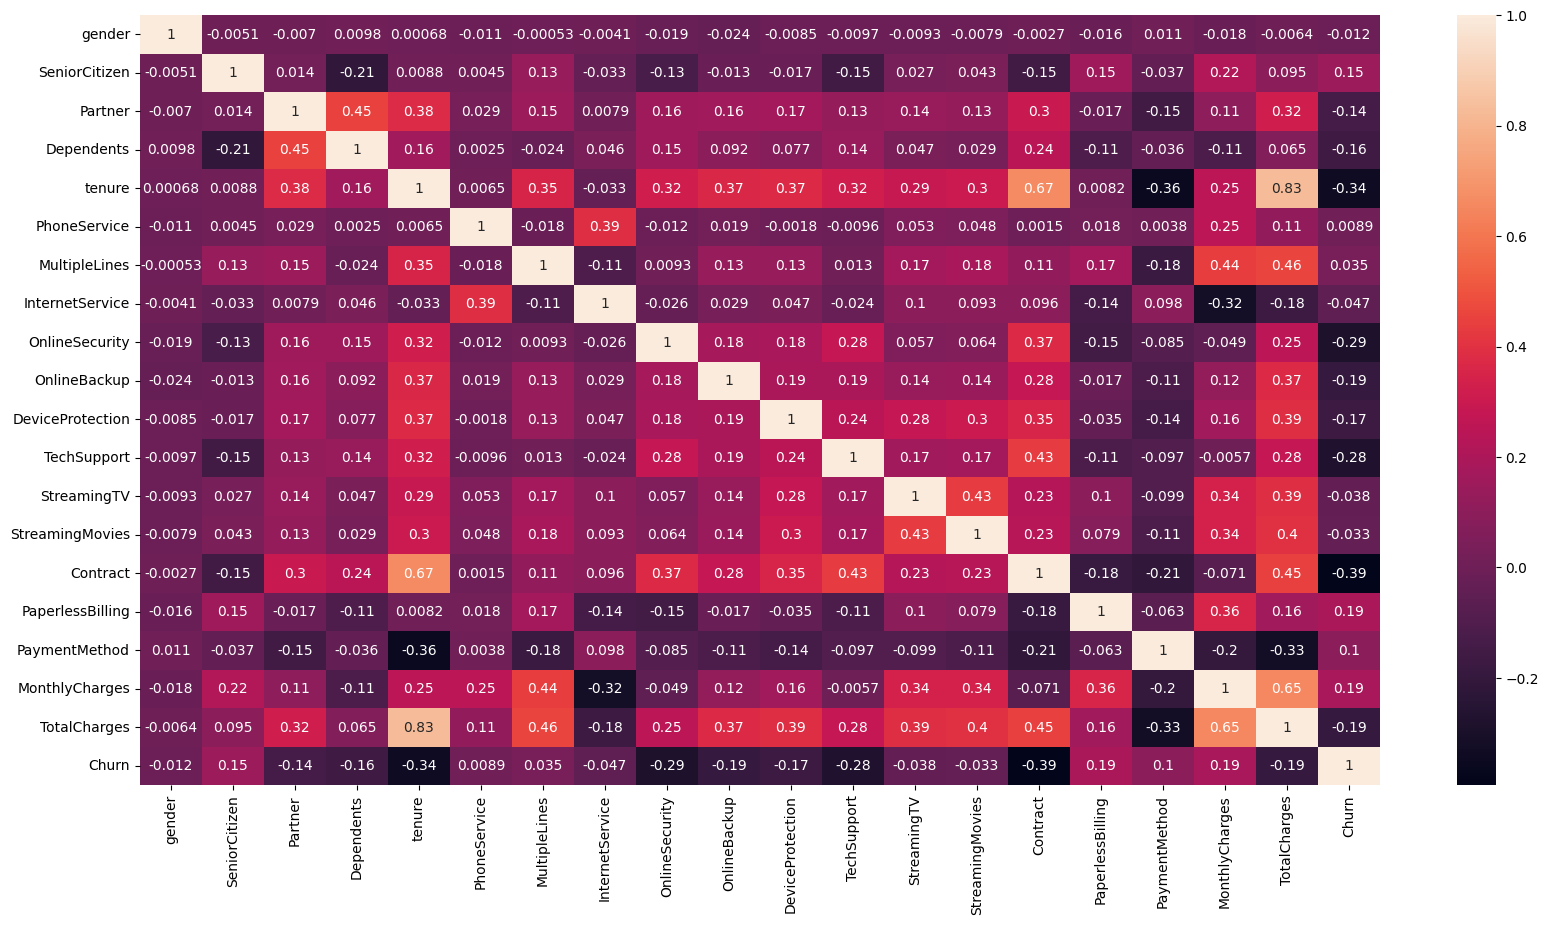

In [ ]:
#heatmap correlation
# Gabungkan X_train dan y_train menjadi satu DataFrame
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

# Gabungkan keduanya menjadi satu DataFrame
data_train = pd.concat([X_train_df, y_train_df], axis=1)

# Hitung korelasi
plt.figure(figsize=(20,10))
sns.heatmap(data_train.corr(),annot = True)
plt.show()

semua fitur dengan churn memiliki korelasi yang rendah, sedangkan antar fitur-fiturnya beberapa memiliki korelasi yang cukup tinggi seperti tenure dengan total charges

<Axes: xlabel='TotalCharges', ylabel='Count'>

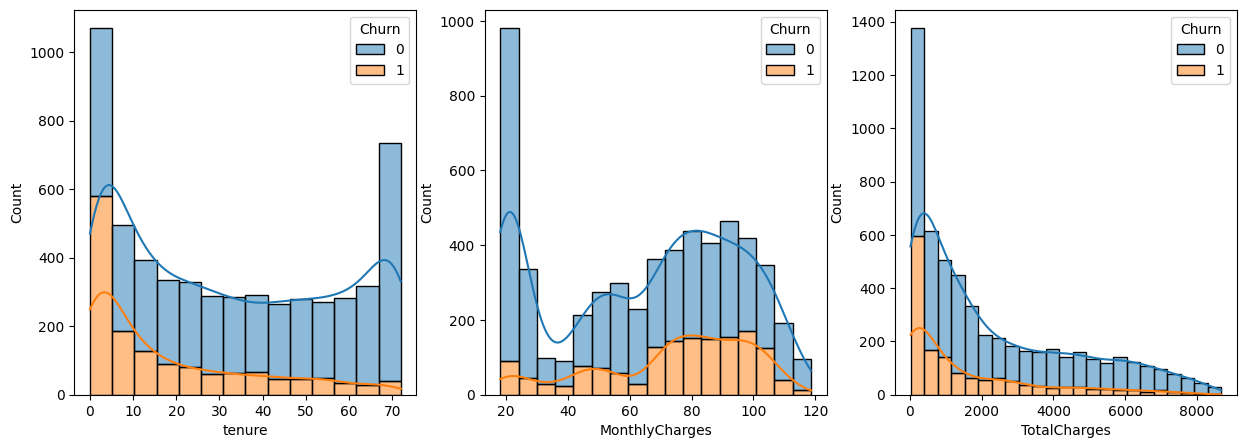

In [ ]:
# Visualisasi distribusi menggunakan histplot dalam satu baris
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=data_train, x='tenure', hue='Churn', multiple="stack", kde=True, ax=ax[0])
sns.histplot(data=data_train, x='MonthlyCharges', hue='Churn', multiple="stack", kde=True, ax=ax[1])
sns.histplot(data=data_train, x='TotalCharges', hue='Churn', multiple="stack", kde=True, ax=ax[2])

customer dengan tenure yang rendah dan total charges yang rendah cenderung memeliki tingkat churn yang tinggi. sedangkan untuk monthly charges cenderung memiliki tingkat chrun yang tinggi antara 70 - 130

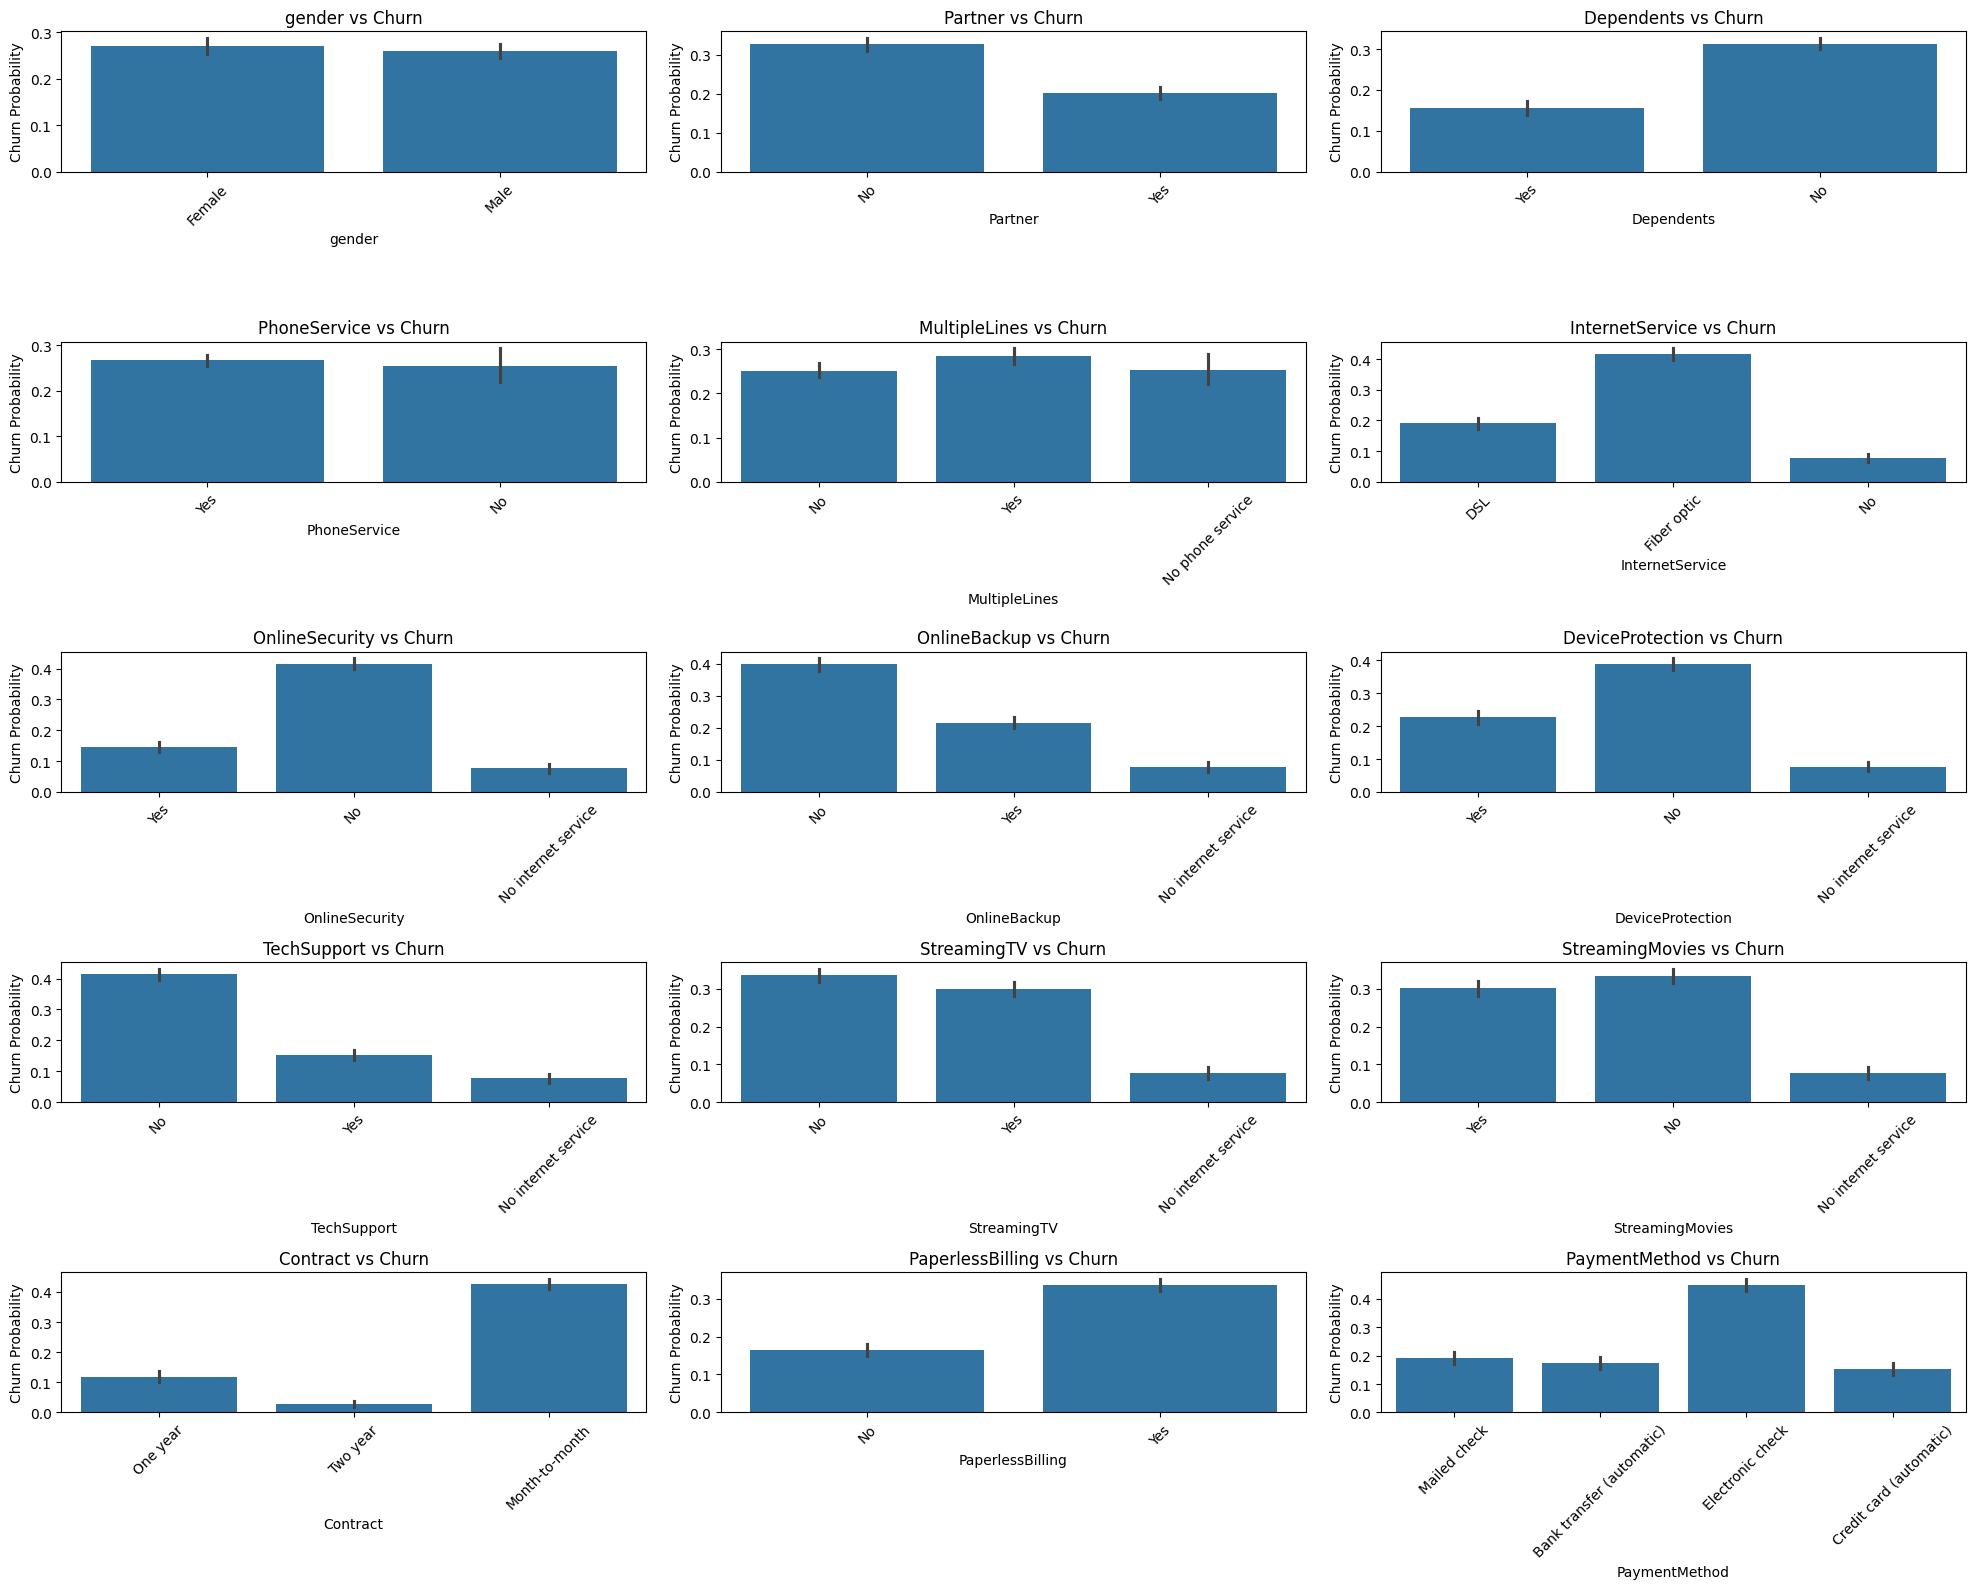

In [ ]:
# Gabungkan X_train dan y_train menjadi satu DataFrame
X_train_ = pd.DataFrame(X_train_)
y_train_ = pd.DataFrame(y_train)

# Gabungkan keduanya menjadi satu DataFrame
df_train = pd.concat([X_train_, y_train_], axis=1)

fig, axes = plt.subplots(5, 3, figsize=(20, 16))  # Ukuran gambar yang lebih besar
axes = axes.flatten()  # Meratakan axes agar mudah diakses

# Loop untuk menggambar bar plot untuk masing-masing fitur kategori
for i, col in enumerate(categorical_cols):
    sns.barplot(x=col, y="Churn", data=df_train, ax=axes[i])
    axes[i].set_ylabel("Churn Probability")
    axes[i].set_title(f"{col} vs Churn")
    axes[i].tick_params(axis='x', rotation=45)  # Rotasi label x agar lebih mudah dibaca

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()


customer dengan no partner, no dependents, fiber optics, no online security, no online backup, no device protection, no techsupport, mounth to mounth contract, yes paperless billing, dan electronic check method cenderung memiliki peluang churn yang tinggi

#### Imbalance with smote

In [ ]:
# handlign imbalance dengan smote
from imblearn import over_sampling
X_train_smote, y_train_smote = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [ ]:
y_train_smote.value_counts(normalize=True)

,proportion
Churn,
0,0.5
1,0.5


#### Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_smote)
X_std = scaler.transform(X_train_smote)

### Modeling (Gunakan lebih min 2 model dan bandingkan hasil evaluasinya)

Bebas menggunakan model, mau menggunakan decision tree, random forest, xgboost, dll juga boleh<br><br>
silahkan berekspresi :)

#### Random Forest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

#Model Random Forest
model_rf = RandomForestClassifier()

# Inisialisasi KFold split dengan 5 kelompok
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store m etrics
f1_scores = []
recall_scores = []
precision_scores = []

for train_index, test_index in kf.split(X_std):
    X_train_, X_val = X_std[train_index], X_std[test_index]
    y_train_, y_val = y_train_smote.values[train_index], y_train_smote.values[test_index]

    model_rf.fit(X_train_, y_train_)
    y_pred_val_rf = model_rf.predict(X_val)

    f1_scores.append(f1_score(y_val, y_pred_val_rf))
    recall_scores.append(recall_score(y_val, y_pred_val_rf))
    precision_scores.append(precision_score(y_val, y_pred_val_rf))

f1_mean, f1_std = np.mean(f1_scores), np.std(f1_scores)
recall_mean, recall_std = np.mean(recall_scores), np.std(recall_scores)
precision_mean, precision_std = np.mean(precision_scores), np.std(precision_scores)


print(f"Random Forest:")
print(f"F1-Score mean: {f1_mean:.4f}, F1-Score std: {f1_std:.4f}")
print(f"Recall mean: {recall_mean:.4f}, Recall std: {recall_std:.4f}")
print(f"Precision mean: {precision_mean:.4f}, Precision std: {precision_std:.4f}")

Random Forest:
F1-Score mean: 0.8471, F1-Score std: 0.0089
Recall mean: 0.8452, Recall std: 0.0113
Precision mean: 0.8491, Precision std: 0.0102


#### Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Model Decision Tree
model_dt = DecisionTreeClassifier()

# Inisialisasi KFold split dengan 5 kelompok
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics
f1_scores = []
recall_scores = []
precision_scores = []

for train_index, test_index in kf.split(X_std):
    X_train_, X_val = X_std[train_index], X_std[test_index]
    y_train_, y_val = y_train_smote.values[train_index], y_train_smote.values[test_index]

    model_dt.fit(X_train_, y_train_)
    y_pred_val_dt = model_dt.predict(X_val)

    f1_scores.append(f1_score(y_val, y_pred_val_dt))
    recall_scores.append(recall_score(y_val, y_pred_val_dt))
    precision_scores.append(precision_score(y_val, y_pred_val_dt))

f1_mean, f1_std = np.mean(f1_scores), np.std(f1_scores)
recall_mean, recall_std = np.mean(recall_scores), np.std(recall_scores)
precision_mean, precision_std = np.mean(precision_scores), np.std(precision_scores)

print(f"Decision Tree :")
print(f"F1-Score mean: {f1_mean:.4f}, F1-Score std: {f1_std:.4f}")
print(f"Recall mean: {recall_mean:.4f}, Recall std: {recall_std:.4f}")
print(f"Precision mean: {precision_mean:.4f}, Precision std: {precision_std:.4f}")

Decision Tree :
F1-Score mean: 0.7924, F1-Score std: 0.0054
Recall mean: 0.8038, Recall std: 0.0093
Precision mean: 0.7813, Precision std: 0.0083


### Evaluation

pilih model yang terbaik performannya kemudian beri pejelasan kenapa model tersebut lebih baik dibandingkan dengan yang lain

In [ ]:
#Evaluasi model Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_val_rf))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       830
           1       0.87      0.84      0.85       825

    accuracy                           0.86      1655
   macro avg       0.86      0.86      0.86      1655
weighted avg       0.86      0.86      0.86      1655



In [ ]:
#Evaluasi model Decision Tree
print(classification_report(y_val, y_pred_val_dt))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       830
           1       0.78      0.81      0.80       825

    accuracy                           0.79      1655
   macro avg       0.79      0.79      0.79      1655
weighted avg       0.79      0.79      0.79      1655



Model random forest memiliki precision, recall, f1 score, dan acuracy churn tertinggi dari semua model, sehingga model ini dapat dikatatan model terbaik dalam mengklasifika churn

evaluasi matrik random forest apabila fokus utama adalah tidak churn (0) :
*   Recall untuk churn (0) = 87% ->  Model berhasil mengidentifikasi 87% dari pelanggan yang benar-benar tidak churn. Ini menunjukkan bahwa model baik dalam menghindari False Negative (FN), yaitu kesalahan dalam memprediksi pelanggan yang tidak churn sebagai churn.
*   F1 Score untuk churn (0) = 86% -> berarti model memiliki performa yang baik dalam memprediksi churn dengan
menjaga keseimbangan yang baik antara precision dan recall, sehingga meminimalkan baik False Positive (FP), yaitu ketika model memprediksi churn pada pelanggan yang tidak churn maupun False Negative (FN), yaitu ketika model memprediksi tidak churn pada pelanggan yang sebenarnya churn.



## Test

### Data Preprocessing

#### Missing Value

In [ ]:
#cek value with isnull
X_test.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
#cek missing value satu-satu
for column in X_test.columns:
    print(f"============= {column} =================")
    display(X_test[column].value_counts())
    print()

============= gender =================


,count
gender,
Female,741
Male,668



============= SeniorCitizen =================


,count
SeniorCitizen,
0,1173
1,236



============= Partner =================


,count
Partner,
No,737
Yes,672



============= Dependents =================


,count
Dependents,
No,982
Yes,427



============= tenure =================


,count
tenure,
1,137
72,76
2,64
70,40
3,39
5,31
71,31
4,29
52,27



============= PhoneService =================


,count
PhoneService,
Yes,1279
No,130



============= MultipleLines =================


,count
MultipleLines,
No,705
Yes,574
No phone service,130



============= InternetService =================


,count
InternetService,
Fiber optic,615
DSL,482
No,312



============= OnlineSecurity =================


,count
OnlineSecurity,
No,688
Yes,409
No internet service,312



============= OnlineBackup =================


,count
OnlineBackup,
No,640
Yes,457
No internet service,312



============= DeviceProtection =================


,count
DeviceProtection,
No,606
Yes,491
No internet service,312



============= TechSupport =================


,count
TechSupport,
No,682
Yes,415
No internet service,312



============= StreamingTV =================


,count
StreamingTV,
No,571
Yes,526
No internet service,312



============= StreamingMovies =================


,count
StreamingMovies,
No,562
Yes,535
No internet service,312



============= Contract =================


,count
Contract,
Month-to-month,792
Two year,356
One year,261



============= PaperlessBilling =================


,count
PaperlessBilling,
Yes,846
No,563



============= PaymentMethod =================


,count
PaymentMethod,
Electronic check,478
Mailed check,330
Bank transfer (automatic),306
Credit card (automatic),295



============= MonthlyCharges =================


,count
MonthlyCharges,
19.90,17
20.00,14
20.05,12
19.65,12
19.45,11
19.85,10
20.15,10
20.35,9
19.70,8



============= TotalCharges =================


,count
TotalCharges,
19.65,4
20.35,3
20.00,3
45.30,3
19.45,3
71.35,2
343.45,2
20.75,2
75.45,2


tidak ada missing value

#### categorical encoding

In [ ]:
# Apply the same encoding to test data using the encoders from train data
for col in categorical_cols:
    le = label_encoders[col]
    X_test[col] = le.transform(X_test[col])

#### Scalling

In [ ]:
X_test_std = scaler.transform(X_test)

### Evaluation

pilih model yang terbaik performannya kemudian beri pejelasan kenapa model tersebut lebih baik dibandingkan dengan yang lain

In [ ]:
# Random Forest
y_test_pred_rf = model_rf.predict(X_test_std)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.59      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
# Decision Tree
y_test_pred_dt = model_dt.predict(X_test_std)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1036
           1       0.47      0.55      0.51       373

    accuracy                           0.72      1409
   macro avg       0.65      0.66      0.66      1409
weighted avg       0.73      0.72      0.73      1409



Model random forest memiliki precision, recall, f1 score, dan acuracy churn tertinggi dari semua model, sehingga model ini dapat dikatatan model terbaik dalam mengklasifika churn

evaluasi matrik random forest apabila fokus utama adalah tidak churn (0) :
*   Recall untuk churn (0) = 85% ->  Model berhasil mengidentifikasi 85% dari pelanggan yang benar-benar tidak churn. Ini menunjukkan bahwa model baik dalam menghindari False Negative (FN), yaitu kesalahan dalam memprediksi pelanggan yang tidak churn sebagai churn.
*   F1 Score untuk churn (0) = 85% -> berarti model memiliki performa yang baik dalam memprediksi yang tidak churn dengan menjaga keseimbangan yang baik antara precision dan recall, sehingga meminimalkan baik False Positive (FP), yaitu ketika model memprediksi churn pada pelanggan yang tidak churn maupun False Negative (FN), yaitu ketika model memprediksi tidak churn pada pelanggan yang sebenarnya churn.

### Potential impact

Simulasikan potential impact

In [ ]:
def model_evaluation(model,name):

    confusion_matrix = pd.crosstab(y_test, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

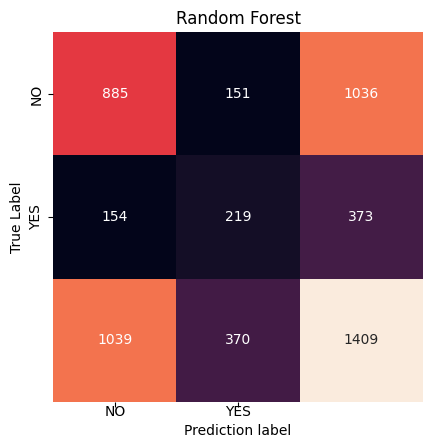

In [ ]:
model_evaluation(y_test_pred_rf,"Random Forest")

In [ ]:
f"{df['TotalCharges'].mean():.2f}"

'2283.30'

Pada kasus churn ini, saya berfokus pada pelanggan yang tidak churn dan saya memilih recall dimana evaluasi ini berfokus pada FN, yaitu pelanggan yang diprediksi tidak churn tapi aslinya pelanggan tersebut churn, sehingga ketika banyak FN maka jumlah pelanggan akan berkurang dan pendapatan perusahaan juga akan berkurang. lalu saya juga memilih matriks evaluasi f1 score karena matriks tersebut dapat menjaga keseimbangan antara precision dan recall, dimana precision concern terhadap FP, yaitu pelanggan yang diprediksi akan churn namun nyatanya pelanggan tersebut tetap bertahan/berlangganan. sehingga jumlah pelanggan yang tidak churn yang diprediksi churn tetap akan berlangganan, namun mengurangi upaya perusahaan yang harus menangani pelanggan yang sebenarnya tidak churn.
<br>


<br>
untuk impact lost dari FP dan FN dapat dihitung sebagai berikut
FP :
<br>FN = 154 (Jumlah pelanggan diprediksi tidak churn,aslinya churn) X 2283.30 (Total Charges) = USD 351628,2
<br>FP = 151 (Jumlah pelanggan diprediksi churn, aslinya tidak churn) X 2283.30 = USD 344778,3
<br>

<br>
jadi impac dari salah prediksi adalah USD 351628,2 dari FN dan 344778,3 dari FP akibat kesalahan model dalam memprediksi churn atau tidak churn.

Kak ini udh benar belum ya? soalnya pas aku restart session dan aku run ulang, nilai matrix evaluationnya berubah berubah, apa yang salah ya kak, terimakasi sebelumnya